In [2]:
#🔹 1. Import ไลบรารีที่จำเป็น
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
# 🔹 2. อ่านไฟล์ CSV และแสดงข้อมูลเบื้องต้นของอากาศ (Air Quality)
file_path_air = "../DataSet/central,-singapore-air-quality.csv"
df_air = pd.read_csv(file_path_air)

print("🔍 ตัวอย่างข้อมูลจากไฟล์ Air Quality CSV")
print(df_air.head())
print(df_air.info())
print(df_air.isnull().sum())  # ดูว่ามีค่า NaN กี่ตัว

🔍 ตัวอย่างข้อมูลจากไฟล์ Air Quality CSV
       date  pm25  pm10   o3  no2  so2  co  psi
0  2025/3/1    41    29   10         2   4     
1  2025/3/2    40    25   27         2   4     
2  2025/3/3    49    28   22         2   5     
3  2025/3/4    44    29   13         2   6     
4  2025/3/5    57    25   10         3   3     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4091 non-null   object
 1    pm25   4091 non-null   object
 2    pm10   4091 non-null   object
 3    o3     4091 non-null   object
 4    no2    4091 non-null   object
 5    so2    4091 non-null   object
 6    co     4091 non-null   object
 7    psi    4091 non-null   object
dtypes: object(8)
memory usage: 255.8+ KB
None
date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
 psi     0
dtype: int64


In [4]:
# 🔹 3. แปลงคอลัมน์ date เป็น datetime
df_air["date"] = pd.to_datetime(df_air["date"], format="%Y/%m/%d", errors="coerce")
print(df_air.dtypes)  # ต้องเห็นว่า date เป็น datetime64[ns]
print(df_air.dtypes)
print("\n📅 ช่วงเวลาของข้อมูลใน Air Quality:")
print(f"เริ่มต้น: {df_air['date'].min()} → สิ้นสุด: {df_air['date'].max()}")

date     datetime64[ns]
 pm25            object
 pm10            object
 o3              object
 no2             object
 so2             object
 co              object
 psi             object
dtype: object
date     datetime64[ns]
 pm25            object
 pm10            object
 o3              object
 no2             object
 so2             object
 co              object
 psi             object
dtype: object

📅 ช่วงเวลาของข้อมูลใน Air Quality:
เริ่มต้น: 2013-12-31 00:00:00 → สิ้นสุด: 2025-03-23 00:00:00


In [5]:
# 🔹 4. กรองข้อมูลเฉพาะช่วงปี 2015 - 2018 สำหรับ Air Quality
df_air_filtered = df_air[(df_air["date"].dt.year >= 2015) & (df_air["date"].dt.year <= 2018)]
print("\n📆 ตัวอย่างข้อมูล Air Quality หลังกรอง (2015-2018):")
print(df_air_filtered.head())
print(f"ช่วงเวลา: {df_air_filtered['date'].min()} → {df_air_filtered['date'].max()}")


📆 ตัวอย่างข้อมูล Air Quality หลังกรอง (2015-2018):
           date  pm25  pm10   o3  no2  so2  co  psi
2268 2018-10-01    66    37   27         4   4     
2269 2018-10-02    63    43   19         4   6     
2270 2018-10-03    85    40   24         4   5     
2271 2018-10-04    63    39   26         5   5     
2272 2018-10-05    68    39   18         4   5     
ช่วงเวลา: 2015-01-01 00:00:00 → 2018-12-31 00:00:00


In [6]:
# 🔹 5. แปลงค่าคอลัมน์ตัวเลขจาก object เป็น float ใน Air Quality
df_air_filtered.columns = df_air_filtered.columns.str.strip()  # ลบช่องว่างออกจากชื่อคอลัมน์
cols = ["pm25", "pm10", "o3", "no2", "so2", "co", "psi"]
df_air_filtered[cols] = df_air_filtered[cols].apply(pd.to_numeric, errors="coerce")
print("\n📌 ประเภทข้อมูลใน Air Quality หลังแปลง:")
print(df_air_filtered.dtypes)


📌 ประเภทข้อมูลใน Air Quality หลังแปลง:
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
psi            float64
dtype: object


C:\Users\Asus\AppData\Local\Temp\ipykernel_36540\781712523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_filtered[cols] = df_air_filtered[cols].apply(pd.to_numeric, errors="coerce")


In [7]:
# 🔹 6. อ่านไฟล์ CSV และแสดงข้อมูลเบื้องต้นของสภาพอากาศ (Ang Mo Kio)
file_path_angmokio = "../DataSet/angmokio.csv"
df_angmokio = pd.read_csv(file_path_angmokio)

In [8]:
# 🔹 7. ลบคอลัมน์ Unnamed: 0 ถ้ามี
df_angmokio = df_angmokio.drop(columns=["Unnamed: 0"], errors="ignore")
print(df_angmokio.head())

      Station  Year  Month  Day  Daily Rainfall Total (mm)  \
0  Ang Mo Kio  2014      1    1                        0.0   
1  Ang Mo Kio  2014      1    2                        0.0   
2  Ang Mo Kio  2014      1    3                        8.8   
3  Ang Mo Kio  2014      1    4                        1.4   
4  Ang Mo Kio  2014      1    5                        7.2   

   Highest 30 min Rainfall (mm)  Highest 60 min Rainfall (mm)  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           8.6                           8.8   
3                           1.4                           1.4   
4                           1.6                           3.2   

   Highest 120 min Rainfall (mm)  Mean Temperature (°C)  \
0                            0.0                   26.3   
1                            0.0                   26.9   
2                            8.8                   26.5   


In [9]:
# 🔹 8. ตรวจสอบชื่อคอลัมน์ใน Ang Mo Kio
print("\n📌 ชื่อคอลัมน์ใน Ang Mo Kio:")
print(df_angmokio.columns)


📌 ชื่อคอลัมน์ใน Ang Mo Kio:
Index(['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')


In [10]:
# 🔹 9. สร้างคอลัมน์ date จาก Year, Month, Day ใน Ang Mo Kio
df_angmokio["date"] = pd.to_datetime(df_angmokio[["Year", "Month", "Day"]])
print("\n📌 ตัวอย่างข้อมูล Ang Mo Kio หลังสร้างคอลัมน์ date:")
print(df_angmokio.head())


📌 ตัวอย่างข้อมูล Ang Mo Kio หลังสร้างคอลัมน์ date:
      Station  Year  Month  Day  Daily Rainfall Total (mm)  \
0  Ang Mo Kio  2014      1    1                        0.0   
1  Ang Mo Kio  2014      1    2                        0.0   
2  Ang Mo Kio  2014      1    3                        8.8   
3  Ang Mo Kio  2014      1    4                        1.4   
4  Ang Mo Kio  2014      1    5                        7.2   

   Highest 30 min Rainfall (mm)  Highest 60 min Rainfall (mm)  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           8.6                           8.8   
3                           1.4                           1.4   
4                           1.6                           3.2   

   Highest 120 min Rainfall (mm)  Mean Temperature (°C)  \
0                            0.0                   26.3   
1                            0.0                   26.9   
2      

In [11]:
# 🔹 10. กรองข้อมูลเฉพาะช่วงปี 2015 - 2018 สำหรับ Ang Mo Kio
df_angmokio_filtered = df_angmokio[df_angmokio["Year"].between(2015, 2018)]
print("\n📆 ตัวอย่างข้อมูล Ang Mo Kio หลังกรอง (2015-2018):")
print(df_angmokio_filtered.head())
print(f"ช่วงเวลา: {df_angmokio_filtered['date'].min()} → {df_angmokio_filtered['date'].max()}")


📆 ตัวอย่างข้อมูล Ang Mo Kio หลังกรอง (2015-2018):
        Station  Year  Month  Day  Daily Rainfall Total (mm)  \
365  Ang Mo Kio  2015      1    1                        0.2   
366  Ang Mo Kio  2015      1    2                        0.0   
367  Ang Mo Kio  2015      1    3                        0.4   
368  Ang Mo Kio  2015      1    4                        0.0   
369  Ang Mo Kio  2015      1    5                        0.0   

     Highest 30 min Rainfall (mm)  Highest 60 min Rainfall (mm)  \
365                           0.2                           0.2   
366                           0.0                           0.0   
367                           0.4                           0.4   
368                           0.0                           0.0   
369                           0.0                           0.0   

     Highest 120 min Rainfall (mm)  Mean Temperature (°C)  \
365                            0.2                   25.6   
366                            0.0     

In [12]:
#🔹 1. ตรวจสอบและจัดการค่าที่หายไป (Missing Data)
print("\n📌 ค่า NaN ใน Air Quality (กรองแล้ว):")
print(df_air_filtered.isnull().sum())

print("\n📌 ค่า NaN ใน Ang Mo Kio (กรองแล้ว):")
print(df_angmokio_filtered.isnull().sum())


📌 ค่า NaN ใน Air Quality (กรองแล้ว):
date      0
pm25     27
pm10      9
o3        9
no2     284
so2      52
co       47
psi     761
dtype: int64

📌 ค่า NaN ใน Ang Mo Kio (กรองแล้ว):
Station                           0
Year                              0
Month                             0
Day                               0
Daily Rainfall Total (mm)        17
Highest 30 min Rainfall (mm)     17
Highest 60 min Rainfall (mm)     17
Highest 120 min Rainfall (mm)    17
Mean Temperature (°C)            10
Maximum Temperature (°C)         10
Minimum Temperature (°C)         10
Mean Wind Speed (km/h)            8
Max Wind Speed (km/h)             9
date                              0
dtype: int64


In [13]:
# 🛠 วิธีจัดการค่า NaN: เติมค่า NaN ด้วยค่าเฉลี่ยของแต่ละคอลัมน์ที่เป็นตัวเลข
df_air_filtered.fillna(df_air_filtered.mean(numeric_only=True), inplace=True)
df_angmokio_filtered.fillna(df_angmokio_filtered.mean(numeric_only=True), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_36540\2328549323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_filtered.fillna(df_air_filtered.mean(numeric_only=True), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_36540\2328549323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angmokio_filtered.fillna(df_angmokio_filtered.mean(numeric_only=True), inplace=True)


In [14]:
# ตรวจสอบผลลัพธ์หลังการเติมค่า NaN
print("\n📌 ค่า NaN หลังเติมค่าใน Air Quality:")
print(df_air_filtered.isnull().sum())

print("\n📌 ค่า NaN หลังเติมค่าใน Ang Mo Kio:")
print(df_angmokio_filtered.isnull().sum())


📌 ค่า NaN หลังเติมค่าใน Air Quality:
date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
psi     0
dtype: int64

📌 ค่า NaN หลังเติมค่าใน Ang Mo Kio:
Station                          0
Year                             0
Month                            0
Day                              0
Daily Rainfall Total (mm)        0
Highest 30 min Rainfall (mm)     0
Highest 60 min Rainfall (mm)     0
Highest 120 min Rainfall (mm)    0
Mean Temperature (°C)            0
Maximum Temperature (°C)         0
Minimum Temperature (°C)         0
Mean Wind Speed (km/h)           0
Max Wind Speed (km/h)            0
date                             0
dtype: int64


In [15]:
#🔹 2. รวมข้อมูลจากทั้งสองชุด (Merge Dataset)
# ใช้ on="date" เพื่อรวมข้อมูลตามวันที่ (inner join)
df_merged = pd.merge(df_air_filtered, df_angmokio_filtered, on="date", how="inner")
print("\n📌 ข้อมูลหลังจากรวมชุดข้อมูล:")
print(df_merged.head())

# ลบคอลัมน์ที่ไม่ต้องการออก
cols_to_drop = ["Station", "Year", "Month", "Day",
                "Highest 30 min Rainfall (mm)", "Highest 60 min Rainfall (mm)", "Highest 120 min Rainfall (mm)"]
df_merged = df_merged.drop(columns=cols_to_drop, errors="ignore")
print("\n📌 ข้อมูลหลังจากลบคอลัมน์ที่ไม่ต้องการ:")
print(df_merged.head())

# ตรวจสอบประเภทข้อมูล
print("\n📌 ประเภทข้อมูลใน df_merged:")
print(df_merged.dtypes)


📌 ข้อมูลหลังจากรวมชุดข้อมูล:
        date  pm25  pm10    o3        no2  so2   co        psi     Station  \
0 2018-10-01  66.0  37.0  27.0  14.287543  4.0  4.0  56.061871  Ang Mo Kio   
1 2018-10-02  63.0  43.0  19.0  14.287543  4.0  6.0  56.061871  Ang Mo Kio   
2 2018-10-03  85.0  40.0  24.0  14.287543  4.0  5.0  56.061871  Ang Mo Kio   
3 2018-10-04  63.0  39.0  26.0  14.287543  5.0  5.0  56.061871  Ang Mo Kio   
4 2018-10-05  68.0  39.0  18.0  14.287543  4.0  5.0  56.061871  Ang Mo Kio   

   Year  ...  Day  Daily Rainfall Total (mm)  Highest 30 min Rainfall (mm)  \
0  2018  ...    1                        0.0                           0.0   
1  2018  ...    2                        0.0                           0.0   
2  2018  ...    3                        0.0                           0.0   
3  2018  ...    4                        0.0                           0.0   
4  2018  ...    5                        0.0                           0.0   

   Highest 60 min Rainfall (mm) 

In [16]:
#🔹 3. ตรวจสอบค่าซ้ำ (Duplicate Data)
print("\n📌 จำนวนแถวข้อมูลที่ซ้ำ:")
duplicates = df_merged.duplicated().sum()
print(duplicates)
if duplicates > 0:
    df_merged = df_merged.drop_duplicates()
    print("📌 ลบแถวข้อมูลที่ซ้ำแล้ว")


📌 จำนวนแถวข้อมูลที่ซ้ำ:
0


In [17]:
#🔹 4. ตรวจสอบค่าหายไปใน df_merged
print("\n📌 ค่า NaN ใน df_merged:")
print(df_merged.isnull().sum())


📌 ค่า NaN ใน df_merged:
date                         0
pm25                         0
pm10                         0
o3                           0
no2                          0
so2                          0
co                           0
psi                          0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Maximum Temperature (°C)     0
Minimum Temperature (°C)     0
Mean Wind Speed (km/h)       0
Max Wind Speed (km/h)        0
dtype: int64


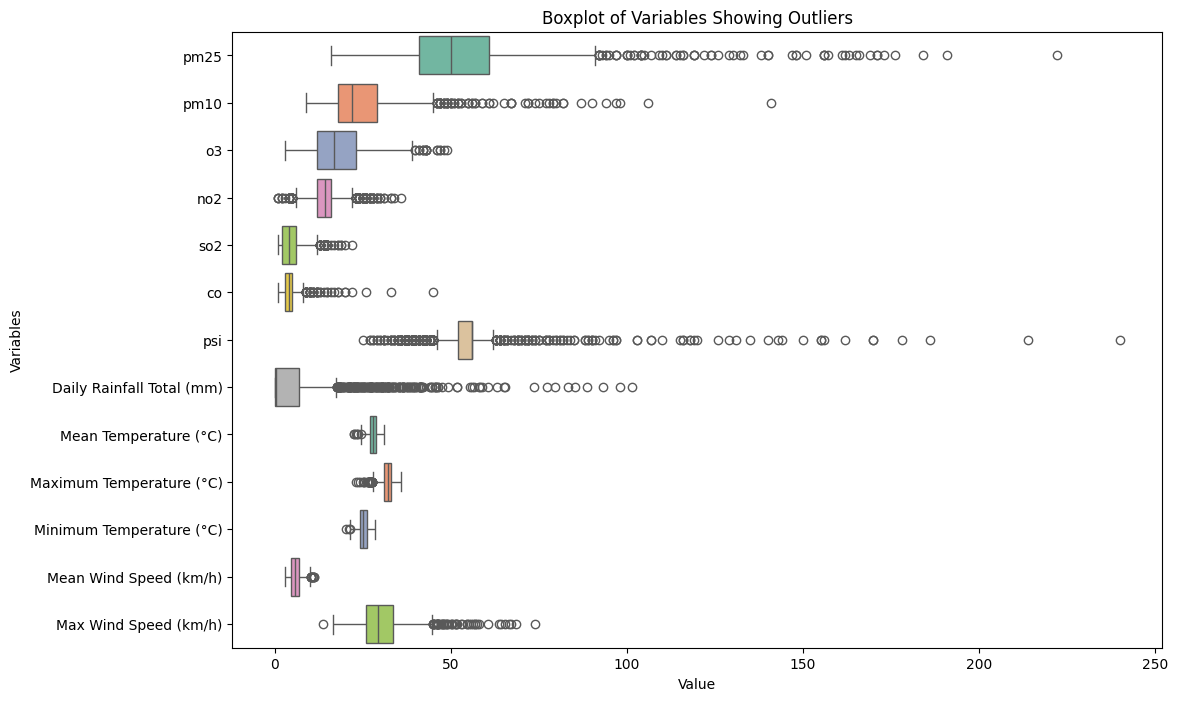

In [18]:
# 🔹 5. ตรวจสอบค่าผิดปกติ (Outliers) ด้วย IQR
# การตรวจสอบค่าผิดปกติด้วย IQR (Interquartile Range)
Q1 = df_merged.quantile(0.25)
Q3 = df_merged.quantile(0.75)
IQR = Q3 - Q1

# วาดกราฟ boxplot เพื่อแสดงค่าผิดปกติ
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_merged, orient="h", palette="Set2")
plt.title("Boxplot of Variables Showing Outliers")
plt.xlabel("Value")
plt.ylabel("Variables")
plt.show()

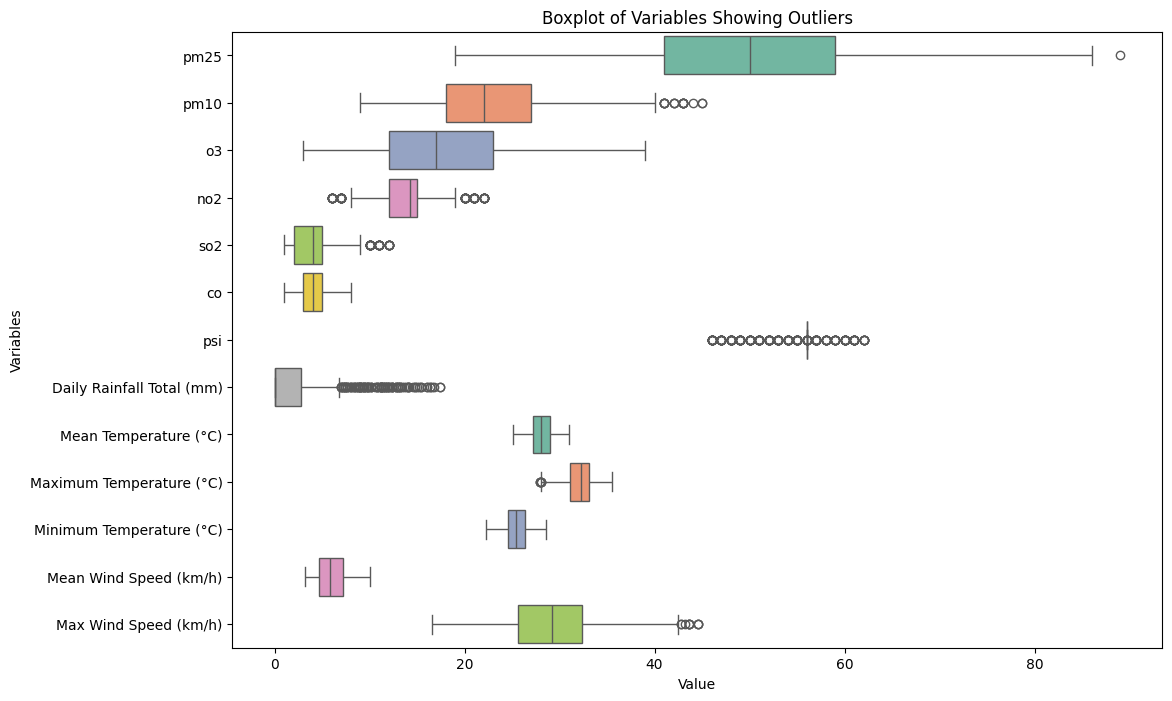

In [19]:
df_merged = df_merged[~((df_merged < (Q1 - 1.5 * IQR)) | (df_merged > (Q3 + 1.5 * IQR))).any(axis=1)]
# วาดกราฟ boxplot เพื่อแสดงค่าผิดปกติ
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_merged, orient="h", palette="Set2")
plt.title("Boxplot of Variables Showing Outliers")
plt.xlabel("Value")
plt.ylabel("Variables")
plt.show()


📌 ความสัมพันธ์ระหว่างตัวแปร:
                               date      pm25      pm10        o3       no2  \
date                       1.000000  0.066609  0.279946  0.003162  0.078925   
pm25                       0.066609  1.000000  0.684314  0.240620  0.175699   
pm10                       0.279946  0.684314  1.000000  0.244679  0.115126   
o3                         0.003162  0.240620  0.244679  1.000000 -0.013100   
no2                        0.078925  0.175699  0.115126 -0.013100  1.000000   
so2                        0.020400  0.107175 -0.012293 -0.097043  0.302506   
co                         0.290716 -0.016044  0.038766  0.023067  0.213226   
psi                        0.369669  0.145097  0.227179  0.217239  0.155494   
Daily Rainfall Total (mm)  0.096328 -0.081828 -0.081423 -0.149047  0.060510   
Mean Temperature (°C)     -0.092011  0.175480  0.085002  0.018527  0.068939   
Maximum Temperature (°C)  -0.113248  0.205202  0.081400  0.088380  0.070799   
Minimum Temperature (°

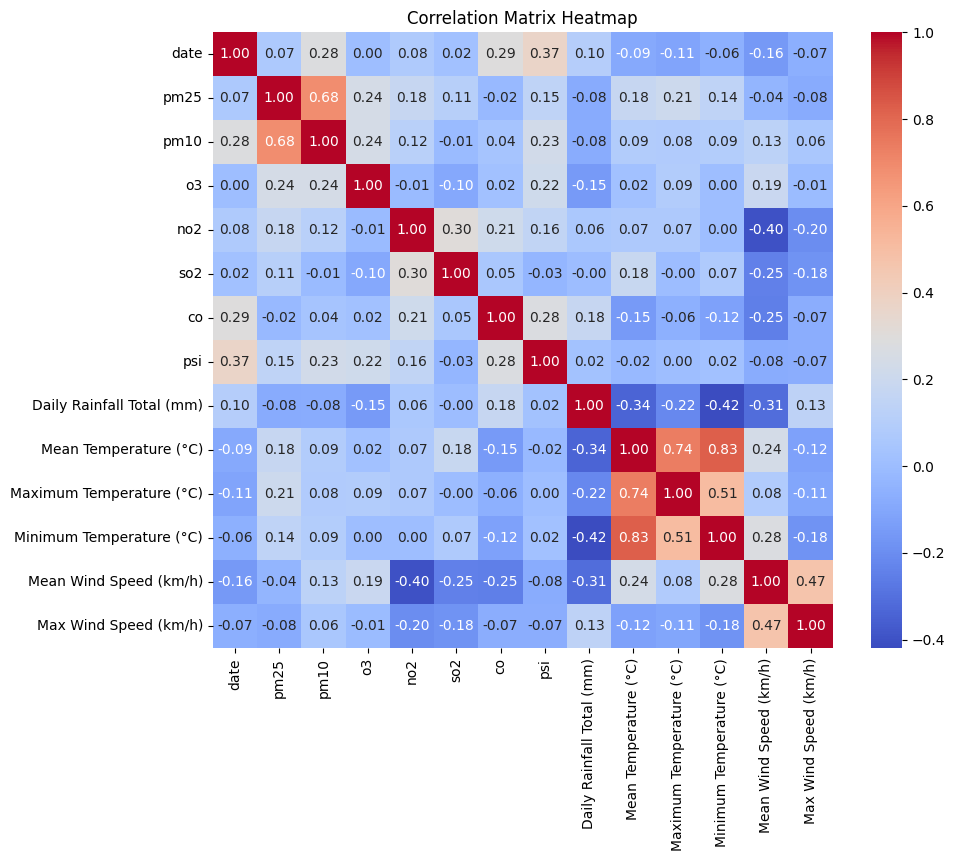

In [20]:
# 🔹 6. ตรวจสอบความสัมพันธ์ของตัวแปร (Correlation)
correlation_matrix = df_merged.corr()
print("\n📌 ความสัมพันธ์ระหว่างตัวแปร:")
print(correlation_matrix)

# วาดกราฟ heatmap ของ correlation matrix เพื่อให้ดูภาพรวมความสัมพันธ์
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:
# แสดงรายละเอียดของข้อมูล df_merged
# 1️⃣ แสดงชื่อคอลัมน์ทั้งหมดในชุดข้อมูล
print("📌 คอลัมน์ทั้งหมดในชุดข้อมูล:")
print(df_merged.columns)

📌 คอลัมน์ทั้งหมดในชุดข้อมูล:
Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'psi',
       'Daily Rainfall Total (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')


In [22]:
# 2️⃣ แสดงช่วงเวลาของข้อมูล (วันที่เริ่มต้น - วันที่สิ้นสุด)
print("📌 ช่วงเวลาของข้อมูล:")
print(f"เริ่มต้น: {df_merged['date'].min()} → สิ้นสุด: {df_merged['date'].max()}")

📌 ช่วงเวลาของข้อมูล:
เริ่มต้น: 2015-01-02 00:00:00 → สิ้นสุด: 2018-12-31 00:00:00


In [23]:
# 3️⃣ แสดงความถี่ของข้อมูลในแต่ละเดือน
df_merged['year_month'] = df_merged['date'].dt.to_period('M')
print("\n📌 ความถี่ของข้อมูลในแต่ละเดือน:")
print(df_merged['year_month'].value_counts().sort_index())


📌 ความถี่ของข้อมูลในแต่ละเดือน:
year_month
2015-01    10
2015-02    15
2015-03    15
2015-04    13
2015-05    15
2015-06    21
2015-07    18
2015-08    17
2015-10     2
2015-11     5
2015-12    11
2016-01     5
2016-02    10
2016-03    17
2016-04    13
2016-05    12
2016-06    13
2016-07    14
2016-08    13
2016-09    17
2016-10    15
2016-11     8
2016-12    23
2017-01    23
2017-02    21
2017-03    19
2017-04    12
2017-05    20
2017-06    24
2017-07    27
2017-08    29
2017-09    19
2017-10    14
2017-11    17
2017-12    20
2018-01    18
2018-02    19
2018-03    21
2018-04    24
2018-05    23
2018-06    20
2018-07    24
2018-08    22
2018-09    23
2018-10    20
2018-11    23
2018-12    25
Freq: M, Name: count, dtype: int64


In [24]:
# 4️⃣ แสดงข้อมูลสถิติ (Descriptive Statistics)
print("📌 ข้อมูลสถิติโดยรวม:")
print(df_merged.describe())

📌 ข้อมูลสถิติโดยรวม:
                                date        pm25        pm10          o3  \
count                            809  809.000000  809.000000  809.000000   
mean   2017-04-10 05:11:29.740420352   50.189636   23.376025   17.433075   
min              2015-01-02 00:00:00   19.000000    9.000000    3.000000   
25%              2016-06-10 00:00:00   41.000000   18.000000   12.000000   
50%              2017-06-08 00:00:00   50.000000   22.000000   17.000000   
75%              2018-04-03 00:00:00   59.000000   27.000000   23.000000   
max              2018-12-31 00:00:00   89.000000   45.000000   39.000000   
std                              NaN   12.790836    7.170444    7.148881   

              no2        so2          co         psi  \
count  809.000000  809.00000  809.000000  809.000000   
mean    13.828658    4.18039    4.197802   55.101561   
min      6.000000    1.00000    1.000000   46.000000   
25%     12.000000    2.00000    3.000000   56.061871   
50%     14.287

In [25]:
# 5️⃣ ตรวจสอบจำนวนข้อมูลในแต่ละปี
df_merged['year'] = df_merged['date'].dt.year
year_counts = df_merged['year'].value_counts().sort_index()
print("\n📌 จำนวนข้อมูลที่มีในแต่ละปี:")
print(year_counts)


📌 จำนวนข้อมูลที่มีในแต่ละปี:
year
2015    142
2016    160
2017    245
2018    262
Name: count, dtype: int64


In [26]:
# แสดงผลรวมของข้อมูลในทุกปี
total_records = year_counts.sum()
print("\n📌 ผลรวมของข้อมูลในทุกปี:", total_records)


📌 ผลรวมของข้อมูลในทุกปี: 809
